In [1]:
import xnemogcm
import xgcm
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.colors import LogNorm
import cmocean.cm as cmo
import xarray as xr

xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=14

In [2]:
path=('../../MAUD_RISE_config/maud_v4/m36_ke2/section/')

ds_09=xr.open_mfdataset(path+'*2009_m36.nc')
ds_09=ds_09.expand_dims(dim='t')
ds_09['year']=ds_09.t+2009
ds_09.coords['year']=ds_09.year

ds_14=xr.open_mfdataset(path+'*2014_m36.nc')
ds_14=ds_14.expand_dims(dim='t')
ds_14['year']=ds_14.t+2014
ds_14.coords['year']=ds_14.year

bat=xr.open_dataset('../../MAUD_RISE_config/maud_v4/m36_mask/1_domain_cfg_50levels_new.nc')
bat.coords['nav_lon']=bat.nav_lon.mean(dim='y')
bat.coords['nav_lat']=bat.nav_lat.mean(dim='x')
bat=bat.swap_dims({'x':'x_c','y':'y_c','z':'z_c'})
xloc=268
bat=bat.isel(x_c=xloc)
deptht=bat.e3t_1d.cumsum(dim='z_c')- 0.5*bat.e3t_1d.isel(z_c=0)
bat['depth']=deptht
mask=xr.open_mfdataset('../../MAUD_RISE_config/maud_v4/m36_mask/mask*.nc')
mask=mask.isel(x_c=xloc)
ds_14=xr.merge((ds_14,bat.bathy_meter,bat.depth,mask))

In [3]:
ds=xr.concat((ds_09,ds_14),dim='t')
ds.coords['depth']=ds.depth
ds

<xarray.Dataset>
Dimensions:      (t: 2, y_c: 804, z_c: 50)
Coordinates:
    depth        (z_c) float64 0.5112 1.585 2.722 ... 5.499e+03 5.957e+03
    nav_lon      float32 2.417
    nav_lat      (y_c) float32 -70.54 -70.5 -70.49 ... -61.58 -61.57 -61.55
  * y_c          (y_c) int64 0 1 2 3 4 5 6 7 ... 796 797 798 799 800 801 802 803
    x_c          int64 268
  * z_c          (z_c) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    glamt        (y_c) float64 2.417 2.417 2.417 2.417 ... 2.417 2.417 2.417
    gphit        (y_c) float64 -70.54 -70.5 -70.49 ... -61.58 -61.57 -61.55
    year         (t) int64 2009 2014
Dimensions without coordinates: t
Data variables:
    mask_ha      (y_c) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    mask_tc      (y_c) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    mask_tr      (y_c) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    bathy_meter  (y_c) float32 ...
    mask_ha_mod  (y_c) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    so           (t, z_c, y_c) float32 dask.array<chunksize=(1, 50, 804), meta=np.ndarray>
    thetao       (t, z_c, y_c) float32 dask.array<chunksize=(1, 50, 804), meta=np.ndarray>
    uo           (t, z_c, y_c) float32 dask.array<chunksize=(1, 50, 804), meta=np.ndarray>

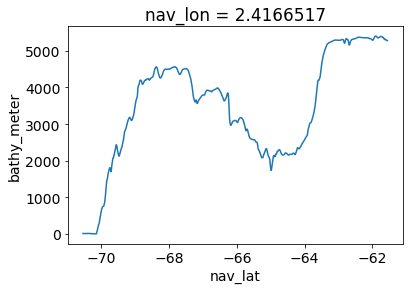

In [19]:
bat.bathy_meter.plot(x="nav_lat")

In [6]:

tc=np.where(ds.mask_tc==1)[0]
ha=np.where(ds.mask_ha_mod==1)[0]

In [13]:
minor_ticks=np.arange(-70,-60,0.5)

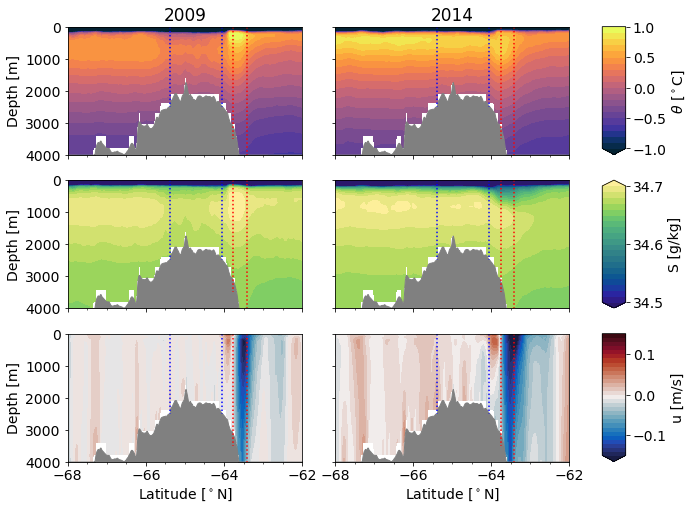

In [29]:
ymax=4000
fig,axes=plt.subplots(3,3,figsize=(10,8),gridspec_kw={'width_ratios':[1,1,0.1]})

ax=axes[0,0]
#ax.set_facecolor('gray')
ds.thetao.isel(t=0).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=-1,vmax=1,levels=21,cmap=cmo.thermal,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.invert_yaxis()
ax.set_title('%d'%ds.year[0])
ax.set_xticks(minor_ticks, minor=True)
ax.set_ylabel('Depth [m]')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_xlim(-68,-62)

ax=axes[0,1]
#ax.set_facecolor('gray')
cbt=ds.thetao.isel(t=1).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=-1,vmax=1,levels=21,cmap=cmo.thermal,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.set_xticks(minor_ticks, minor=True)
ax.invert_yaxis()
ax.set_title('%d'%ds.year[1])
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_xlim(-68,-62)
plt.colorbar(cbt,cax=axes[0,2],ticks=np.linspace(-1,1,5),label='$\\theta$ [$^\circ$C]')


ax=axes[1,0]
#ax.set_facecolor('gray')
ds.so.isel(t=0).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=34.5,vmax=34.7,levels=21,cmap=cmo.haline,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.set_xticks(minor_ticks, minor=True)
ax.invert_yaxis()
ax.set_title('')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_xlim(-68,-62)

ax=axes[1,1]
#ax.set_facecolor('gray')
cbs=ds.so.isel(t=1).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=34.5,vmax=34.7,levels=21,cmap=cmo.haline,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.set_xticks(minor_ticks, minor=True)
ax.invert_yaxis()
ax.set_title('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_xlim(-68,-62)
plt.colorbar(cbs,cax=axes[1,2],ticks=np.linspace(34.5,34.7,3),label='S [g/kg]')

ax=axes[2,0]
#ax.set_facecolor('gray')
ds.uo.isel(t=0).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=-0.15,vmax=0.15,levels=31,cmap=cmo.balance,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.set_xticks(minor_ticks, minor=True)
ax.invert_yaxis()
ax.set_title('')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_xlim(-68,-62)

ax=axes[2,1]
#ax.set_facecolor('gray')
cbu=ds.uo.isel(t=1).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=-0.15,vmax=0.15,levels=31,cmap=cmo.balance,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.set_xticks(minor_ticks, minor=True)
ax.invert_yaxis()
ax.set_title('')
ax.set_ylabel('')
ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_yticklabels([])
ax.set_xlim(-68,-62)
plt.colorbar(cbu,cax=axes[2,2],ticks=np.linspace(-0.10,0.10,3),label='u [m/s]')
plt.savefig('./TSU_sections_2009_2014.png',dpi=300)

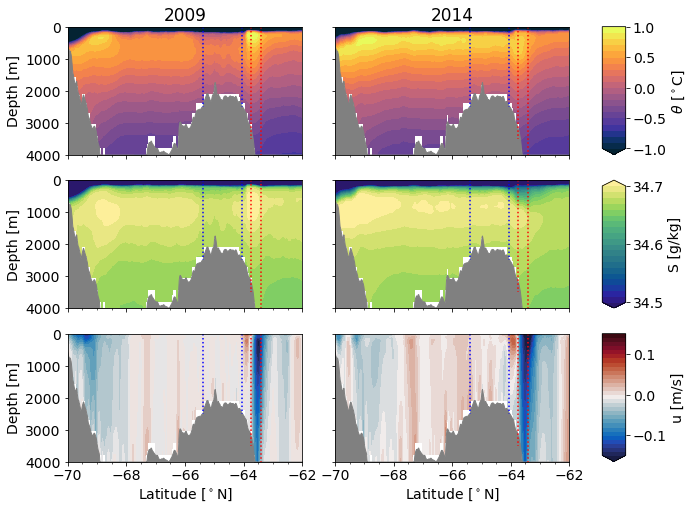

In [32]:
ymax=4000
fig,axes=plt.subplots(3,3,figsize=(10,8),gridspec_kw={'width_ratios':[1,1,0.1]})

ax=axes[0,0]
#ax.set_facecolor('gray')
ds.thetao.isel(t=0).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=-1,vmax=1,levels=21,cmap=cmo.thermal,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.invert_yaxis()
ax.set_title('%d'%ds.year[0])
ax.set_xticks(minor_ticks, minor=True)
ax.set_ylabel('Depth [m]')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_xlim(-70,-62)

ax=axes[0,1]
#ax.set_facecolor('gray')
cbt=ds.thetao.isel(t=1).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=-1,vmax=1,levels=21,cmap=cmo.thermal,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.set_xticks(minor_ticks, minor=True)
ax.invert_yaxis()
ax.set_title('%d'%ds.year[1])
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_xlim(-70,-62)
plt.colorbar(cbt,cax=axes[0,2],ticks=np.linspace(-1,1,5),label='$\\theta$ [$^\circ$C]')


ax=axes[1,0]
#ax.set_facecolor('gray')
ds.so.isel(t=0).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=34.5,vmax=34.7,levels=21,cmap=cmo.haline,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.set_xticks(minor_ticks, minor=True)
ax.invert_yaxis()
ax.set_title('')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_xlim(-70,-62)

ax=axes[1,1]
#ax.set_facecolor('gray')
cbs=ds.so.isel(t=1).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=34.5,vmax=34.7,levels=21,cmap=cmo.haline,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.set_xticks(minor_ticks, minor=True)
ax.invert_yaxis()
ax.set_title('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_xlim(-70,-62)
plt.colorbar(cbs,cax=axes[1,2],ticks=np.linspace(34.5,34.7,3),label='S [g/kg]')

ax=axes[2,0]
#ax.set_facecolor('gray')
ds.uo.isel(t=0).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=-0.15,vmax=0.15,levels=31,cmap=cmo.balance,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.set_xticks(minor_ticks, minor=True)
ax.invert_yaxis()
ax.set_title('')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_xlim(-70,-62)

ax=axes[2,1]
#ax.set_facecolor('gray')
cbu=ds.uo.isel(t=1).where(ds.depth<ds.bathy_meter).plot.contourf(x="gphit",y="depth",ax=ax,vmin=-0.15,vmax=0.15,levels=31,cmap=cmo.balance,add_colorbar=False)
ax.fill_between(bat.nav_lat,bat.bathy_meter,ymax,color='gray')
ax.vlines(x=ds.gphit.isel(y_c=tc[0]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=tc[-1]),ymin=0,ymax=2500,color='b',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[0]),ymin=0,ymax=3500,color='r',linestyle=':')
ax.vlines(x=ds.gphit.isel(y_c=ha[-1]),ymin=0,ymax=5000,color='r',linestyle=':')
ax.set_ylim(0,ymax)
ax.set_xticks(minor_ticks, minor=True)
ax.invert_yaxis()
ax.set_title('')
ax.set_ylabel('')
ax.set_xlabel('Latitude [$^\circ$N]')
ax.set_yticklabels([])
ax.set_xlim(-70,-62)
plt.colorbar(cbu,cax=axes[2,2],ticks=np.linspace(-0.10,0.10,3),label='u [m/s]')